# Deep Learning On CIFAR-10 Dataset Using CNN

The objective of this practical exercise is to create a CNN model that can properly classify the 10 classes of the CIFAR 10 dataset. Let's get started!

### Table of interest:
1. Introduction
2. Import and Preprocess the data
 + 2.1 Import all required libraries
 + 2.2 Import and preproces of data
 + 2.3 Distribution of data.
3. Defining the model architecture Using ConVnets
4. Model training
5. Evaluate the model
 + 5.1 Training and validations cuvre
 + 5.2 Score trained model and prediction.
 + 5.3 Classification report.
 + 5.4 Check for the predictions.

## 1. Introduction.
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10
classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets
provides 10,000 images. This image taken from the CIFAR repository ( <a href = "https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html </a>). This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset. 

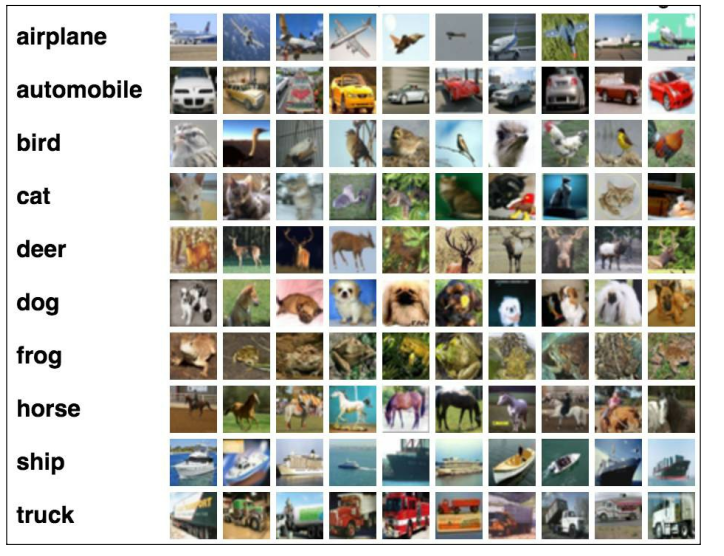


The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

Let's get started!

## 2. Import and Preprocess the data

### 2.1 Import all required libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools




### 2.2 Import and preproces of data 
We load the data and split it between train and test sets


In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 273s 2us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


### 2.3 Data Preprocessing.

If we plot the distribution, it is going to take some time. Let's give you some insights.

Each class contains exacly 6000 examples( 5000 for training and 1000 for test). Which tells us that the data is perfectly balanced for all the classes. It's important to know the distribution of dataset behind different classes because the goodness of our model depends on it.

Now let's do some preprocessing.

The output variable has 10 possible values. This is a multiclass classification problem. We need to encode these lables to one hot vectors (ex : "bird" -> [0,0,1,0,0,0,0,0,0,0]). 

In [4]:
num_classes = 10

# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 3. Defining the model architecture Using ConVnets

Now Let us define a suitable deep net.

* In the first stage, Our net will learn **32 convolutional filters**, each of which with a **3 x 3 size**. The output dimension is the same one of the input shape, so it will be **32 x 32** and activation is `relu`, which is a simple way of introducing non-linearity; folowed by another **32 convolutional filters**, each of which with a **3 x 3 size** and activation is also `relu`. After that we have a **max-pooling** operation with `pool size` **2 x 2** and a `dropout` at **25%.**
* In the next stage in the deep pipeline, Our net will learn **64 convolutional filters**, each of which with a **3 x 3 size**. The output dimension is the same one of the input shape and activation is `relu`; folowed by another **64 convolutional filters**, each of which with a **3 x 3 size** and activation is also `relu`. After that we have a **max-pooling** operation with `pool size` **2 x 2** and a `dropout` at **25%.**
* And the Final stage in the deep pipeline is a dense network with **512 units** and `relu` activation followed by a `dropout` at **50%** and by a `softmax` layer with **10 classes as output**, one for each category.

Now let us look at the code review for our architecture.

In [6]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Now your task is to create the following blocks in the same order:
# CONV => RELU => CONV => RELU => POOL => DROPOUT
# 1. Conv layer with 64 channels and 3x3 kernel
# 2. Relu activation
# 3. Conv layer with 64 channels and 3x3 kernel
# 4. relu activation
# 5. Max pooling 2D layer, with pool size of 2x2
# 6. A dropout layer with ratio 0.5 (which is mainly used to avoid overfitting)

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Next, you need to create the following layers in the same order:
# FLATTERN => DENSE => RELU => DROPOUT
#1. A flatten layer
#2. A dense layer of 512 neurons
#3. relu activation
#4. A dropout layer with ratio 0.5

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

#### Make sure that this is how the model looks like

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
#=================================================================
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 15, 15, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
#=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

And now, let us train the model.

## 4. Model training

Before making network ready for training we have to make sure to add below things:
*   **A loss function:** to measure how good the network is
*   **An optimizer:** to update network as it sees more data and reduce loss value
*   **Metrics:** to monitor performance of network

**Also note that for data augmentation:**
* One of the most commun tehnique to avoid overfitting is data augmentation. And We know that overfitting is generaly occur when we don't have enought data for training the model. To avoid this overfitting problem, we need to expand artificially our dataset. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit. 

* Different data aumentation techniques are as follows: Cropping, Rotating, Scaling, Translating, Flipping, Adding Gaussian noise to input images, etc...


In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [11]:
# Set the number of epochs as a hyperparameters (epochs = )
# <write your code here>
# epochs = ...
epochs = 10

In [12]:
history = model.fit(x_train, y_train,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.5557 - loss: 1.2392 - val_accuracy: 0.6088 - val_loss: 1.1018
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.5803 - loss: 1.1803 - val_accuracy: 0.6224 - val_loss: 1.0553
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.6006 - loss: 1.1235 - val_accuracy: 0.6419 - val_loss: 1.0303
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.6136 - loss: 1.0881 - val_accuracy: 0.6552 - val_loss: 0.9838
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.6311 - loss: 1.0439 - val_accuracy: 0.6526 - val_loss: 0.9753
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.6439 - loss: 1.0180 - val_accuracy: 0.6819 - val_loss: 0.9072
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6559 - loss: 0.9860 - val_accuracy: 0.6743 - val_loss: 0.9173
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 

## 5. Evaluate the model.

### 5.1 Training and validation curves.
Let's see the training and validation process by the visualization of history of fitting. This allow us to quickly know if how our model fit our data **(overfitting, underfitting, model convergence, etc...)**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


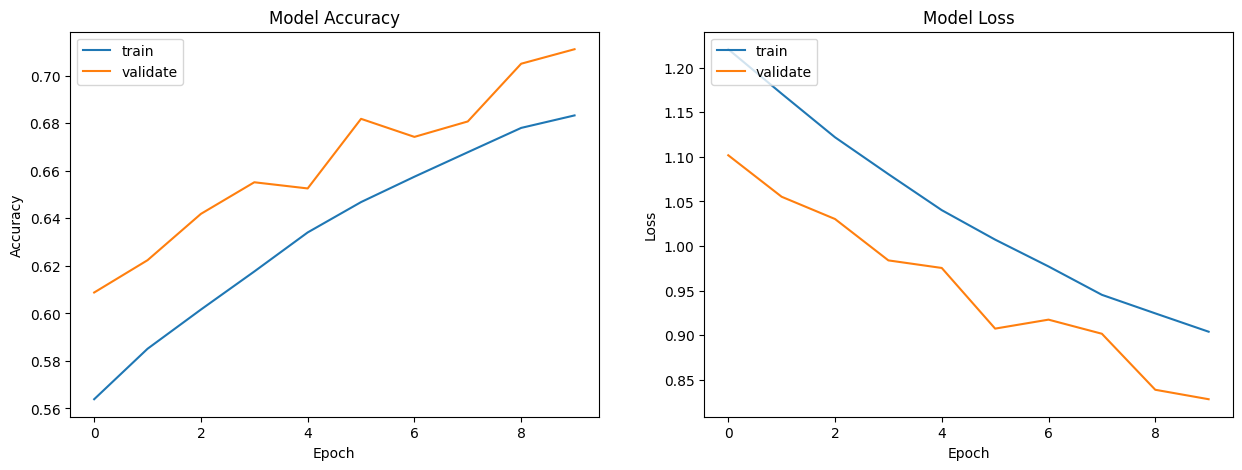

In [13]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)


What do you conclude from these plots? Is the model overfitting, underfitting, or doing fine?

\<write your answer here\>
i increased the number of epochs from 5 to 10 to see the performence in a more clear way
the model is performing well and doesnt show strong signs of overfitting or underfitting for this number of epochs
i wanted to try more epochs but it taking to much time.

### 5.2 Score trained model and prediction.

In [18]:
# Get the test accuracy of your model

# <write your code here>
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7116 - loss: 0.8227
Test Accuracy: 0.7112


### 5.3 Classification report

This will allow us to evaluate the model with other metrics **(Precision, Recall, F1 score, etc...)**

In [47]:
# <write your code here>
y_pred = model.predict(x_test, verbose=1)
Y_pred_classes = (y_pred > 0.5).astype("int32")
print(classification_report(y_test, Y_pred_classes))
Y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices
Y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      1000
           1       0.87      0.83      0.85      1000
           2       0.77      0.42      0.54      1000
           3       0.66      0.28      0.40      1000
           4       0.76      0.50      0.60      1000
           5       0.77      0.43      0.55      1000
           6       0.72      0.84      0.77      1000
           7       0.91      0.59      0.72      1000
           8       0.83      0.83      0.83      1000
           9       0.88      0.76      0.82      1000

   micro avg       0.81      0.61      0.69     10000
   macro avg       0.80      0.61      0.68     10000
weighted avg       0.80      0.61      0.68     10000
 samples avg       0.61      0.61      0.61     10000



C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Let's do some interesting checks to see how the model is performing on some of the images

### 5.4 Check the correct predictions.

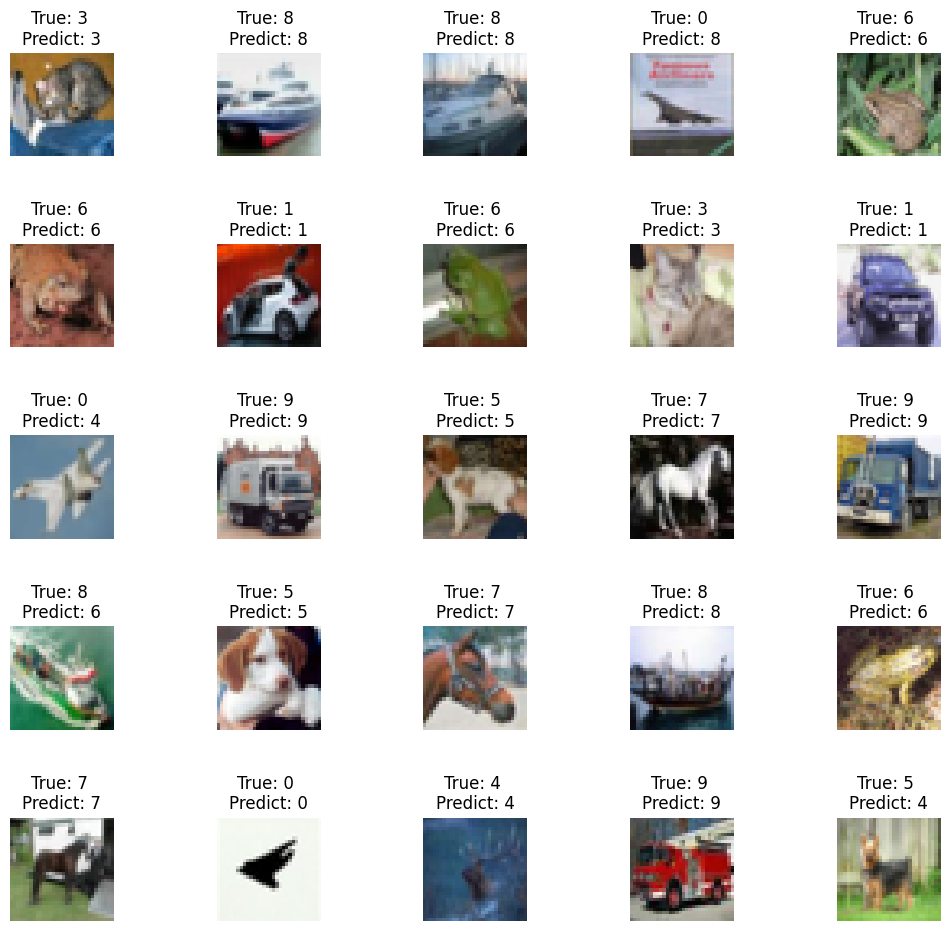

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

labels=[0,1,2,3,4,5,6,7,8,9]

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    true_label = np.argmax(y_test[i])  
    pred_label = np.argmax(y_pred[i])  
    axes[i].set_title(f"True: {labels[true_label]} \nPredict: {labels[pred_label]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


#### - Check the wrong predictions.

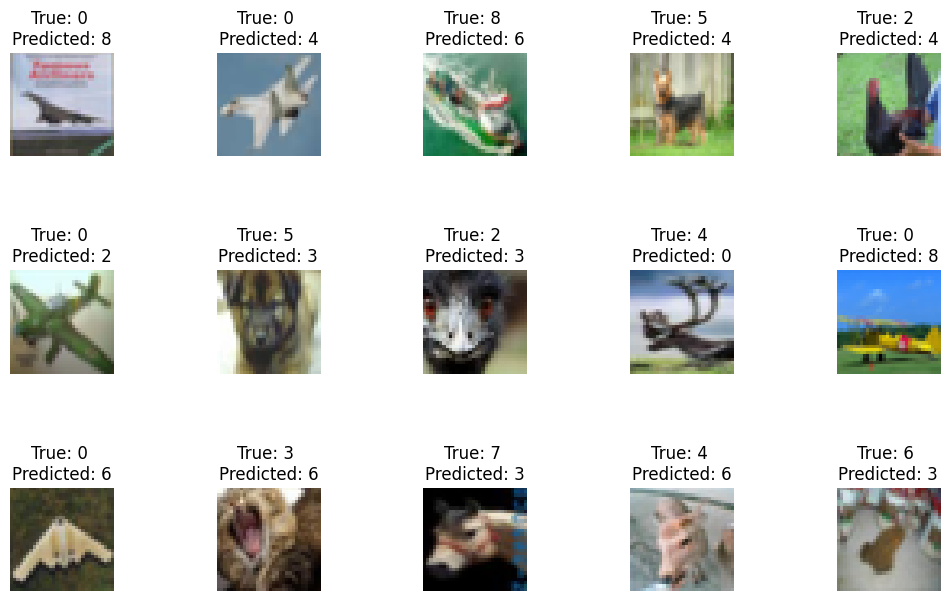

In [51]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    true_label = Y_true[misclassified_idx[i]]
    pred_label = Y_pred_classes[misclassified_idx[i]]
    
    axes[i].set_title(f"True: {labels[true_label]} \nPredicted: {labels[pred_label]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
